## 분석 계획
1. wpct = f(pay, pay**2) 계산
2. 승률 편차 = 실제 승률 - wpct 계산
3. 승률 편차 높은 팀, 낮은 팀 비교. 상/하위 2팀 전력 비교?

### 데이터 현황
- 18~20년 팀별 연봉 총액, 평균 연봉은 kbo 홈페이지에 있음
- 이전은??

### WAR대비 승수
- 2018년 기준 KBO에서 대체선수들로 이뤄진 팀의 승수는 33승
    - 출처: 프로야구 스카우팅 리포트 2019
- 근데 분석 결과에도 win-war이 33 근처에서 나타남
- 5할 승률인 72승 거두려면 팀 WAR은 39 필요
    - 144경기 체제에서 39보다 많이 작거나, 많이 큰(ex: 2018년 한화) 팀 알아보기

### 연봉 대비 승률
- 연봉의 2차 회귀식 예측값과 실제 승률 간의 상관계수는 0.36, R**2는 0.13
- 승률의 13%만 설명함. 나머지는 연봉 외적인 요소

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks') # 그래프를 seaborn 스타일로 그리기
plt.rc('font', family = 'AppleGothic') # 한글 처리

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_pickle('final_data.pkl')
df['승률'] = df['승률'].astype(float)
df

,팀,연도,선수 수,총액(억),평균(억),crowd,avg_crowd,size,순,G,승,패,무,승차,승률,rank_bat,war_batting,rank_pit,war_pitching,war
107,SK,2019,53.0,96.1500,1.814151,982962,13652,23000.0,1,144,88,55,1,-,0.615,6,19.10,1,30.31,49.41
145,두산,2019,47.0,78.7000,1.543137,983474,13659,24411.0,1,144,88,55,1,0.0,0.615,2,27.97,2,23.81,51.78
233,키움,2019,47.0,56.9400,1.324186,453886,6304,16784.0,3,144,86,57,1,2.0,0.601,1,32.46,3,22.38,54.84
80,LG,2019,51.0,75.5200,1.348571,1000400,13894,24411.0,4,144,79,64,1,9.0,0.552,5,21.84,5,14.99,36.83
87,NC,2019,50.0,74.5900,1.657556,710274,9865,22112.0,5,144,73,69,2,14.5,0.514,3,26.43,4,17.55,43.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,삼성,2008,NaN,58.2325,NaN,387231,6147,10000.0,4,126,65,61,0,18.0,0.516,5,21.64,5,19.63,41.27
256,한화,2008,NaN,42.3600,NaN,372986,5920,13042.0,5,126,64,62,0,19.0,0.508,4,23.64,7,18.04,41.68
26,KIA,2008,NaN,39.2450,NaN,367794,5838,12400.0,6,126,57,69,0,26.0,0.452,7,16.88,4,21.21,38.09
222,키움,2008,NaN,29.1200,NaN,258077,4096,12500.0,7,126,50,76,0,33.0,0.397,6,17.87,6,18.67,36.54


In [4]:
# 정규화하여 모델링해 보기. 2차식으로
# min_max_scaler = MinMaxScaler()
# std_scaler = StandardScaler()
# output = std_scaler.fit_transform(x)
# output = pd.DataFrame(output)
# print(output.describe())

In [5]:
# 정규화한 회귀식. 그래도 결과는 안한 것과 같음
# model_reg = LinearRegression()
# output.rename(columns = {0: 'pay'}, inplace=True)
# output['pay2'] = output['pay'] ** 2

# y = df['승률']

# model_reg.fit(output, y)

In [6]:
# 1차 회귀식
model = LinearRegression()
x = df[['총액(억)']]
x.rename(columns = {'총액(억)': 'pay'}, inplace=True)
y = df['승률']

model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [7]:
# 2차 회귀식
model2 = LinearRegression()

x2 = df[['총액(억)']]
x2.rename(columns = {'총액(억)': 'pay'}, inplace=True)
x2['pay2'] = x2['pay'] ** 2

y = df['승률']

model2.fit(x2, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

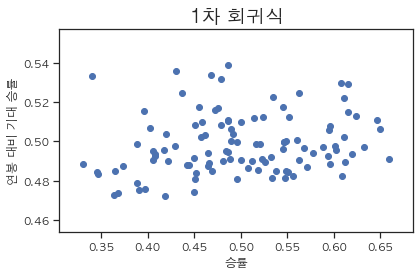

In [8]:
# 1차식 y - yhat
y_pred = model.predict(x)
plt.scatter(y, y_pred)
plt.xlabel("승률")
plt.ylabel('연봉 대비 기대 승률')
plt.title("1차 회귀식", fontsize = 19)
# gt.set(ylim = (0, 30))

# gt.set_xticklabels(
#     gt.get_xticklabels(),
#     rotation = 45,
#     horizontalalignment = 'right'
# )
# gt.legend(loc = 'upper left', ncol = 2) # ncol = 10

plt.tight_layout()
# plt.savefig('plot/gross.png', dpi = 300)
plt.show()

0.528097843553164


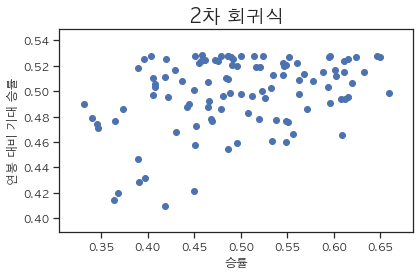

In [9]:
# 2차식 y - yhat
y_pred2 = model2.predict(x2)
print(max(y_pred2)) # 이차 회귀식의 최대값 0.528
plt.scatter(y, y_pred2)
plt.xlabel("승률")
plt.ylabel('연봉 대비 기대 승률')
plt.title("2차 회귀식", fontsize = 19)
# gt.set(ylim = (0, 30))

# gt.set_xticklabels(
#     gt.get_xticklabels(),
#     rotation = 45,
#     horizontalalignment = 'right'
# )
# gt.legend(loc = 'upper left', ncol = 2) # ncol = 10

plt.tight_layout()
# plt.savefig('plot/gross.png', dpi = 300)
plt.show()

## 모델 평가
- R^2: 1차 0.04, 2차 0.13. 3차까지 해도 0.13
- 상관계수: 1차 0.19, 2차 0.36. 3차까지 해도 0.36

In [10]:
print(model.score(x, y)) # 0.04
pd.DataFrame({"y": y, "y_pred": y_pred}).corr() # 0.19

0.036578571675970784


,y,y_pred
y,1.000000,0.191255
y_pred,0.191255,1.000000


In [108]:
print(model2.score(x2, y)) # 0.13
# df[['총액(억)', '승률']].corr() # 0.19
pd.DataFrame({"y": y, "y_pred": y_pred2}).corr() # 0.36

0.1266196293597226


,y,y_pred
y,1.000000,0.355837
y_pred,0.355837,1.000000


In [12]:
# 표준화 회귀식
# y_pred3 = model_reg.predict(output)
# plt.scatter(y, y_pred3)
# plt.xlabel("승률")
# plt.ylabel('연봉 대비 기대 승률')
# plt.title("표준화 2차 회귀식", fontsize = 19)
# gt.set(ylim = (0, 30))

# gt.set_xticklabels(
#     gt.get_xticklabels(),
#     rotation = 45,
#     horizontalalignment = 'right'
# )
# gt.legend(loc = 'upper left', ncol = 2) # ncol = 10

# plt.tight_layout()
# plt.savefig('plot/gross.png', dpi = 300)
# plt.show()

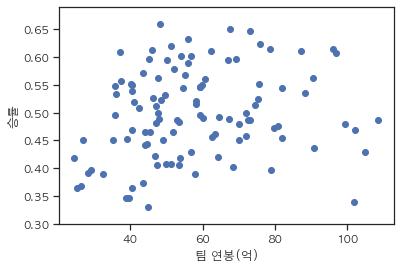

In [109]:
# x - y 산점도
plt.scatter(x2['pay'], y)
plt.xlabel("팀 연봉(억)")
plt.ylabel('승률')
plt.savefig('plot/pay-winrate', dpi = 300)

In [14]:
# 회귀식
print(model2.intercept_)
print(model2.coef_)
# yhat = 0.255 + 0.0076x - 0.000053x^2

0.2546907203341459
[ 7.64589335e-03 -5.34533572e-05]


In [15]:
residual = y - y_pred2
residual

107    0.119323
145    0.089651
233    0.084257
80     0.024750
87    -0.013601
         ...   
210   -0.002669
256    0.025344
26    -0.020427
222   -0.035012
69    -0.111540
Name: 승률, Length: 108, dtype: float64

In [16]:
# WAR과 승수 편차 보기. 144경기 기준
df['승/144'] = df['승'] / df['G'] * 144
df['war/144'] = df['war'] / df['G'] * 144
df['win-war'] = df['승/144'] - df['war/144']

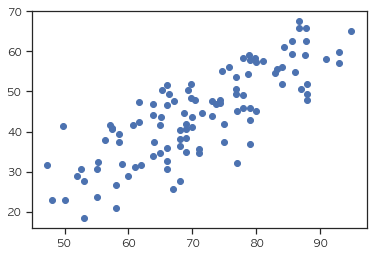

In [17]:
plt.scatter(df['승/144'], df['war/144'])

count    50.00000
mean     32.50820
std       4.73937
min      23.03000
25%      28.98250
50%      31.80500
75%      35.73500
max      44.91000
Name: win-war, dtype: float64


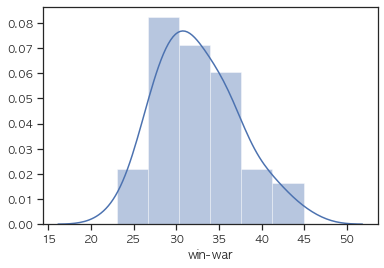

In [111]:
## 144경기 체제 WAR 대비 거둔 승수
print(df[df['G'] == 144]['win-war'].describe())
sns.distplot(df[df['G'] == 144]['win-war']) # 30-35에 많음. 대체 선수로 구성된 팀의 승수는 33 정도
plt.savefig('plot/win-war_144.png', dpi = 300)

count    58.000000
mean     21.724322
std       4.566459
min       8.510075
25%      19.155938
50%      21.538214
75%      24.941250
max      32.860150
Name: win-war, dtype: float64


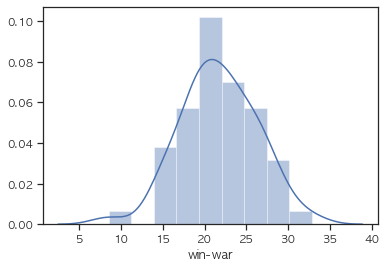

In [112]:
## 144경기 아닌 체제 WAR 대비 거둔 승수
print(df[df['G'] != 144]['win-war'].describe())
sns.distplot(df[df['G'] != 144]['win-war']) # 20에 많음. 대체 선수로 구성된 팀의 승수는 20 정도
plt.savefig('plot/win-war_not144.png', dpi = 300)
# 왜 이렇게 낮을까??? 경기 수가 어떤 영향을 미치는지.

In [110]:
# 승-war 평균 이상 -> 선수 가치 대비 성적이 좋음
# 승-war이 작은 팀 -> 선수 가치 대비 성적이 나쁨
df.groupby('연도').first()['G']

연도
2008    126
2009    133
2010    133
2011    133
2012    133
2013    128
2014    128
2015    144
2016    144
2017    144
2018    144
2019    144
Name: G, dtype: int64

In [118]:
# win-war 상위
# 144경기 체제만
temp = df[df['G'] == 144].sort_values(by='win-war', ascending=False)
temp.head(10) 

,팀,연도,선수 수,총액(억),평균(억),crowd,avg_crowd,size,순,G,...,rank_bat,war_batting,rank_pit,war_pitching,war,승/144,war/144,win-war,war/연봉,승/연봉
266,한화,2018,53.0,88.37,1.667400,734110,10196,13042.0,3,144,...,9,12.22,2,19.87,32.09,77.0,32.09,44.91,0.363132,0.871336
80,LG,2019,51.0,75.52,1.348571,1000400,13894,24411.0,4,144,...,5,21.84,5,14.99,36.83,79.0,36.83,42.17,0.487685,1.046081
33,KIA,2015,NaN,44.04,NaN,710141,9863,20500.0,7,144,...,10,5.51,4,20.09,25.60,67.0,25.60,41.40,0.581290,1.521344
263,한화,2015,NaN,79.69,NaN,657385,9130,13042.0,6,144,...,8,15.68,10,11.91,27.59,68.0,27.59,40.41,0.346217,0.853307
217,삼성,2015,NaN,87.32,NaN,524971,7291,10000.0,1,144,...,1,33.76,8,14.06,47.82,88.0,47.82,40.18,0.547641,1.007787
107,SK,2019,53.0,96.15,1.814151,982962,13652,23000.0,1,144,...,6,19.10,1,30.31,49.41,88.0,49.41,38.59,0.513885,0.915237
105,SK,2017,51.0,75.30,1.476471,892541,12396,23000.0,5,144,...,5,20.13,6,17.22,37.35,75.0,37.35,37.65,0.496016,0.996016
86,NC,2018,50.0,53.39,1.067800,442872,6151,22112.0,10,144,...,10,9.66,10,11.15,20.81,58.0,20.81,37.19,0.389773,1.086346
35,KIA,2017,57.0,96.84,1.698947,1024830,14234,20500.0,1,144,...,2,31.23,3,19.33,50.56,87.0,50.56,36.44,0.522098,0.898389
77,LG,2016,57.0,71.97,1.262632,1157646,16078,24411.0,4,144,...,7,20.29,6,14.32,34.61,71.0,34.61,36.39,0.480895,0.986522


In [121]:
temp[['연도', '팀', '승', '순', '승률', 'war', 'win-war']].head(5).to_excel("win-war_top5.xlsx", index = False)

In [119]:
# win-war 하위
temp.tail(10) # 전부 128-133경기 시절. 차이 왜 이렇게 적지?

,팀,연도,선수 수,총액(억),평균(억),crowd,avg_crowd,size,순,G,...,rank_bat,war_batting,rank_pit,war_pitching,war,승/144,war/144,win-war,war/연봉,승/연봉
103,SK,2015,NaN,72.63,NaN,814349,11310,23000.0,5,144,...,6,19.00,2,21.76,40.76,69.0,40.76,28.24,0.561201,0.950021
143,두산,2017,47.0,69.22,1.472766,1094829,15206,24411.0,2,144,...,1,34.75,2,21.48,56.23,84.0,56.23,27.77,0.812337,1.213522
182,롯데,2018,54.0,99.50,1.842600,901634,12523,24500.0,7,144,...,3,24.47,8,16.03,40.50,68.0,40.50,27.50,0.407035,0.683417
40,KT,2017,53.0,38.94,0.734717,686541,9535,22067.0,10,144,...,10,9.68,9,13.18,22.86,50.0,22.86,27.14,0.587057,1.284027
41,KT,2018,51.0,53.85,1.055900,668559,9286,22067.0,9,144,...,8,15.12,6,16.76,31.88,59.0,31.88,27.12,0.592015,1.095636
231,키움,2017,55.0,52.87,0.961273,699380,9714,16784.0,7,144,...,4,23.49,5,18.48,41.97,69.0,41.97,27.03,0.793834,1.305088
76,LG,2015,NaN,69.94,NaN,1053405,14630,24411.0,9,144,...,9,15.28,1,22.22,37.50,64.0,37.50,26.50,0.536174,0.915070
36,KIA,2018,54.0,108.65,2.012000,861729,11968,20500.0,5,144,...,2,26.96,7,16.61,43.57,70.0,43.57,26.43,0.401012,0.644271
183,롯데,2019,54.0,101.83,1.958269,679208,9433,24500.0,10,144,...,10,10.91,8,11.97,22.88,48.0,22.88,25.12,0.224688,0.471374
38,KT,2015,NaN,25.31,NaN,645465,8964,22067.0,10,144,...,7,16.15,9,12.82,28.97,52.0,28.97,23.03,1.144607,2.054524


In [122]:
temp[['연도', '팀', '승', '순', '승률', 'war', 'win-war']].tail(5).to_excel("win-war_bot5.xlsx", index = False)

In [25]:
# 가장 고효율 팀: war/연봉이 가장 큰 팀?
df['war/연봉'] = df['war/144'] / df['총액(억)'] # 1 WAR당 연봉
df['승/연봉'] = df['승/144'] / df['총액(억)'] # 1승당 연봉

In [123]:
# 144경기 체제 연봉 대비 war 가장 높은 팀
df[df['G'] == 144].sort_values(by='war/연봉', ascending=False).head(10)
# df[df['G'] != 144].sort_values(by='war/연봉', ascending=False).head(10)

,팀,연도,선수 수,총액(억),평균(억),crowd,avg_crowd,size,순,G,...,rank_bat,war_batting,rank_pit,war_pitching,war,승/144,war/144,win-war,war/연봉,승/연봉
83,NC,2015,NaN,45.09,NaN,522669,7259,22112.0,2,144,...,4,30.27,3,21.59,51.86,84.0,51.86,32.14,1.150144,1.862941
38,KT,2015,NaN,25.31,NaN,645465,8964,22067.0,10,144,...,7,16.15,9,12.82,28.97,52.0,28.97,23.03,1.144607,2.054524
230,키움,2016,50.0,40.58,0.811600,782121,10863,16784.0,3,144,...,3,23.47,3,21.57,45.04,77.0,45.04,31.96,1.109906,1.897486
84,NC,2016,46.0,55.89,1.215000,549125,7627,22112.0,2,144,...,2,28.87,1,25.78,54.65,83.0,54.65,28.35,0.977814,1.485060
233,키움,2019,47.0,56.94,1.324186,453886,6304,16784.0,3,144,...,1,32.46,3,22.38,54.84,86.0,54.84,31.16,0.963119,1.510362
229,키움,2015,NaN,54.50,NaN,510802,7094,16784.0,4,144,...,2,31.63,5,17.54,49.17,78.0,49.17,28.83,0.902202,1.431193
142,두산,2016,54.0,67.64,1.252593,1165020,16181,24411.0,1,144,...,1,34.81,2,24.93,59.74,93.0,59.74,33.26,0.883205,1.374926
143,두산,2017,47.0,69.22,1.472766,1094829,15206,24411.0,2,144,...,1,34.75,2,21.48,56.23,84.0,56.23,27.77,0.812337,1.213522
231,키움,2017,55.0,52.87,0.961273,699380,9714,16784.0,7,144,...,4,23.49,5,18.48,41.97,69.0,41.97,27.03,0.793834,1.305088
144,두산,2018,47.0,73.06,1.554500,1112066,15445,24411.0,2,144,...,1,37.57,3,19.58,57.15,93.0,57.15,35.85,0.782234,1.272926


In [52]:
# 15년 KT는 10위인데도 연봉 대비 war 2위 -> 연봉이 압도적으로 적기 때문. 아웃라이어로 봐야 할 듯
df[df['G'] == 144].sort_values(by='총액(억)').head(10)[['팀', '연도', '총액(억)']]

,팀,연도,총액(억)
38,KT,2015,25.31
40,KT,2017,38.94
230,키움,2016,40.58
39,KT,2016,43.52
33,KIA,2015,44.04
83,NC,2015,45.09
42,KT,2019,47.61
231,키움,2017,52.87
86,NC,2018,53.39
41,KT,2018,53.85


In [124]:
# 144경기 체제 연봉 대비 승 가장 높은 팀
df[df['G'] == 144].sort_values(by='승/연봉', ascending=False).head(10)
# df[df['G'] != 144].sort_values(by='승/연봉', ascending=False).head(10)

,팀,연도,선수 수,총액(억),평균(억),crowd,avg_crowd,size,순,G,...,rank_bat,war_batting,rank_pit,war_pitching,war,승/144,war/144,win-war,war/연봉,승/연봉
38,KT,2015,NaN,25.31,NaN,645465,8964,22067.0,10,144,...,7,16.15,9,12.82,28.97,52.0,28.97,23.03,1.144607,2.054524
230,키움,2016,50.0,40.58,0.811600,782121,10863,16784.0,3,144,...,3,23.47,3,21.57,45.04,77.0,45.04,31.96,1.109906,1.897486
83,NC,2015,NaN,45.09,NaN,522669,7259,22112.0,2,144,...,4,30.27,3,21.59,51.86,84.0,51.86,32.14,1.150144,1.862941
33,KIA,2015,NaN,44.04,NaN,710141,9863,20500.0,7,144,...,10,5.51,4,20.09,25.60,67.0,25.60,41.40,0.581290,1.521344
233,키움,2019,47.0,56.94,1.324186,453886,6304,16784.0,3,144,...,1,32.46,3,22.38,54.84,86.0,54.84,31.16,0.963119,1.510362
42,KT,2019,51.0,47.61,0.952200,536735,7455,22067.0,6,144,...,4,23.28,7,12.47,35.75,71.0,35.75,35.25,0.750893,1.491283
84,NC,2016,46.0,55.89,1.215000,549125,7627,22112.0,2,144,...,2,28.87,1,25.78,54.65,83.0,54.65,28.35,0.977814,1.485060
229,키움,2015,NaN,54.50,NaN,510802,7094,16784.0,4,144,...,2,31.63,5,17.54,49.17,78.0,49.17,28.83,0.902202,1.431193
142,두산,2016,54.0,67.64,1.252593,1165020,16181,24411.0,1,144,...,1,34.81,2,24.93,59.74,93.0,59.74,33.26,0.883205,1.374926
141,두산,2015,NaN,59.75,NaN,1120381,15560,24411.0,3,144,...,3,31.61,6,14.37,45.98,79.0,45.98,33.02,0.769540,1.322176


In [30]:
# 관중 수와 승리 상관관계
df[['승', 'crowd', 'avg_crowd']].corr()

,승,crowd,avg_crowd
승,1.000000,0.259854,0.214619
crowd,0.259854,1.000000,0.990003
avg_crowd,0.214619,0.990003,1.000000


In [31]:
# 구단별로 승과 관중수 상관관계 보기
teams = df['팀'].unique()
teams

array(['SK', '두산', '키움', 'LG', 'NC', 'KT', 'KIA', '삼성', '한화', '롯데'],
      dtype=object)

In [53]:
# 전체 구단 상관계수: 0.26
df[['승', 'crowd']].corr().loc['crowd', '승']

0.2598535481138016

In [103]:
# SK, 두산은 평균 성적이 좋아서, 성적과 관중 수가 큰 상관이 없는 듯
avg_rank = df.groupby('팀').mean()['순'].sort_values()
teams = avg_rank.index
avg_rank

팀
두산     2.916667
SK     3.166667
삼성     4.000000
NC     4.714286
키움     5.000000
KIA    5.166667
롯데     5.416667
LG     5.916667
한화     7.250000
KT     9.000000
Name: 순, dtype: float64

In [95]:
df[df['팀'] == '키움'][['연도', '승', 'crowd', 'size']]

,연도,승,crowd,size
233,2019,86,453886,16784.0
232,2018,75,454754,16784.0
231,2017,69,699380,16784.0
230,2016,77,782121,16784.0
229,2015,78,510802,16784.0
228,2014,78,442941,12500.0
227,2013,72,479619,12500.0
226,2012,61,599381,12500.0
225,2011,51,441427,12500.0
224,2010,52,399496,12500.0


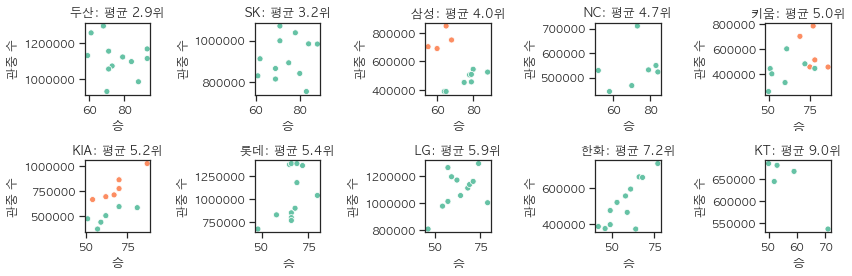

In [133]:
# 팀별 관중수 그래프
plt.figure(figsize = (12, 4))

pos = 0
# cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
for team in teams:
    pos += 1
    plt.subplot(2, 5, pos)
    temp = df[df['팀'] == team]
    temp['size'] = temp['size'].astype(int)
    sns.scatterplot('승', 'crowd', hue = 'size', data = temp, legend = None, palette = "Set2")
    plt.xlabel("승")
    plt.ylabel("관중 수")

    # 상관계수: 일단 계산만 해 두기. 경기장 규모가 달라져서 표시하지는 않음
    corr = temp[['승', 'crowd']].corr().loc['crowd', '승']
    plt.title("{}: 평균 {}위".format(team, str(round(avg_rank[team], 1))))
    plt.tight_layout()

plt.savefig('plot/win_crowd.png', dpi = 300)

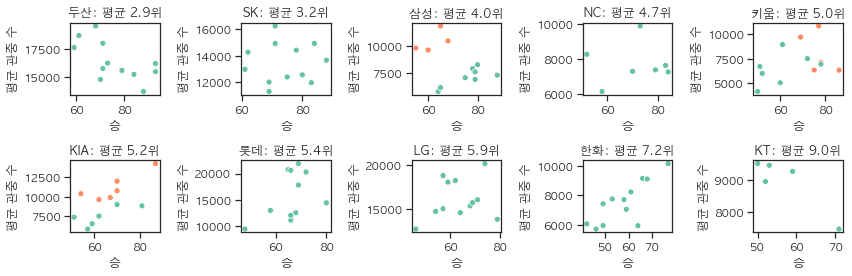

In [128]:
# 팀별 퍙균관중수 그래프
plt.figure(figsize = (12, 4))

pos = 0
for team in teams:
    pos += 1
    plt.subplot(2, 5, pos)
    temp = df[df['팀'] == team]
    sns.scatterplot('승', 'avg_crowd', hue = 'size', data = temp, legend = None, palette = "Set2")
    points = [row for index, row in temp.iterrows()]
    # for p in points: # 점마다 연도 찍기. 찍을 경우 그림을 좀 더 크게
    #     plt.text(p['승'], p['avg_crowd'], p['연도']) # x,y좌표, 값
    plt.xlabel("승")
    plt.ylabel("평균 관중 수")

    # 상관계수: 일단 계산만 해 두기. 경기장 규모가 달라져서 표시하지는 않음
    corr = temp[['승', 'avg_crowd']].corr().loc['avg_crowd', '승'] 
    plt.title("{}: 평균 {}위".format(team, str(round(avg_rank[team], 1))))
    plt.tight_layout() # 팀별 관중수 그래프

plt.savefig('plot/win_avgcrowd.png', dpi = 300)

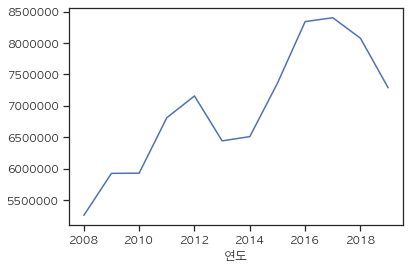

In [36]:
# 연도별 평균 관중 수. 위 그래프에서 이걸 감안해야 함
# 한화에서 64승 - 관중 수 낮은 해는 2008년. 관중수가 최근에 비해 많이 낮을 시절
df.groupby('연도').sum()['crowd'].plot()

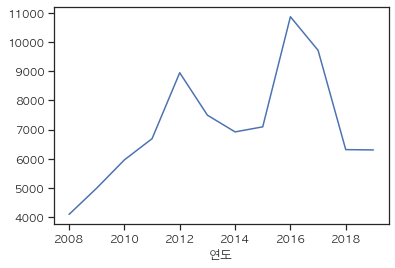

In [37]:
df[df['팀'] == '키움'].groupby('연도').sum()['avg_crowd'].plot()